In [54]:
import requests 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from functools import reduce
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import networkx as nx
import numpy as np

In [79]:
baseurl = 'https://api.sportmonks.com/v3/football/fixtures'
endpoint = '?api_token=JNF3CqMPWkMJDJSYxHX8bqVKnQrofaE5shMqZmGCU2QCmvU2Y3hEM7OfaCtg'
r = requests.get(baseurl+endpoint)


In [80]:
print(r)

<Response [200]>


In [74]:
data  = r.json()
print(data)

{'data': [{'id': 216268, 'sport_id': 1, 'league_id': 271, 'season_id': 1273, 'stage_id': 1086, 'group_id': None, 'aggregate_id': None, 'round_id': 23332, 'state_id': 5, 'venue_id': 618, 'name': 'Esbjerg vs OB', 'starting_at': '2006-03-25 16:00:00', 'result_info': 'Esbjerg won after full-time.', 'leg': '1/1', 'details': None, 'length': 90, 'placeholder': False, 'has_odds': False, 'starting_at_timestamp': 1143302400}, {'id': 216269, 'sport_id': 1, 'league_id': 271, 'season_id': 1273, 'stage_id': 1086, 'group_id': None, 'aggregate_id': None, 'round_id': 23329, 'state_id': 5, 'venue_id': 85765, 'name': 'AaB vs København', 'starting_at': '2005-11-27 16:30:00', 'result_info': 'FC Copenhagen won after full-time.', 'leg': '1/1', 'details': None, 'length': 90, 'placeholder': False, 'has_odds': False, 'starting_at_timestamp': 1133109000}, {'id': 216270, 'sport_id': 1, 'league_id': 271, 'season_id': 1273, 'stage_id': 1086, 'group_id': None, 'aggregate_id': None, 'round_id': 23333, 'state_id': 5, 

In [85]:
df = pd.DataFrame(data['data'])

In [87]:
df.head()

,id,sport_id,league_id,season_id,stage_id,group_id,aggregate_id,round_id,state_id,venue_id,name,starting_at,result_info,leg,details,length,placeholder,has_odds,starting_at_timestamp
0,216268,1,271,1273,1086,None,None,23332,5,618,Esbjerg vs OB,2006-03-25 16:00:00,Esbjerg won after full-time.,1/1,None,90,False,False,1143302400
1,216269,1,271,1273,1086,None,None,23329,5,85765,AaB vs København,2005-11-27 16:30:00,FC Copenhagen won after full-time.,1/1,None,90,False,False,1133109000
2,216270,1,271,1273,1086,None,None,23333,5,85371,Silkeborg vs AGF,2006-03-29 17:00:00,Silkeborg won after full-time.,1/1,None,90,False,False,1143651600
3,216271,1,271,1273,1086,None,None,23325,5,1436,Nordsjælland vs SønderjyskE,2005-10-23 13:00:00,Nordsjælland won after full-time.,1/1,None,90,False,False,1130072400
4,216272,1,271,1273,1086,None,None,23332,5,5661,Horsens vs Viborg,2006-03-19 14:00:00,Horsens won after full-time.,1/1,None,90,False,False,1142776800


In [2]:
#!kaggle datasets download -d davidcariboo/player-scores

In [2]:
players_df = pd.read_csv('player-scores\players.csv')

In [3]:
clubs_df = pd.read_csv('player-scores\clubs.csv')

In [5]:
players_df.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


In [6]:
club_df.head()

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,31,26.5,11,35.5,1,Merck-Stadion am Böllenfalltor,17810,€-1.48m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,NaN,26,27.5,15,57.7,6,Yekaterinburg Arena,23000,€-775k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,31,27.3,15,48.4,12,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,27,26.5,18,66.7,16,Olimpico di Roma,73261,+€63.00m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-154.90m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...


In [7]:
players_df.describe()

,player_id,last_season,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur
count,3.046500e+04,30465.000000,30465.000000,28378.000000,2.933000e+04,2.933000e+04
mean,3.137580e+05,2018.785065,4406.150599,182.248608,1.574258e+06,3.638126e+06
std,2.526105e+05,3.650755,10126.849275,6.840464,6.156570e+06,9.467029e+06
min,1.000000e+01,2012.000000,3.000000,18.000000,1.000000e+04,1.000000e+04
25%,9.581000e+04,2016.000000,403.000000,178.000000,1.000000e+05,2.750000e+05
50%,2.588890e+05,2020.000000,1075.000000,182.000000,2.500000e+05,8.000000e+05
75%,4.697180e+05,2022.000000,3057.000000,187.000000,6.500000e+05,2.800000e+06
max,1.229924e+06,2023.000000,83678.000000,207.000000,1.800000e+08,2.000000e+08


In [8]:
club_df.describe()

,club_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_seats,coach_name,last_season
count,426.000000,0.0,426.000000,388.000000,426.000000,379.000000,426.000000,426.000000,0.0,426.000000
mean,5314.525822,NaN,24.298122,25.427062,11.011737,45.559367,4.718310,24307.868545,NaN,2020.830986
std,11752.013818,NaN,8.764519,1.523957,6.660320,19.885012,4.916287,17136.239606,NaN,3.207283
min,3.000000,NaN,0.000000,18.300000,0.000000,2.400000,0.000000,1312.000000,NaN,2012.000000
25%,421.000000,NaN,25.000000,24.400000,6.000000,31.150000,1.000000,11024.500000,NaN,2019.000000
50%,1139.500000,NaN,27.000000,25.450000,12.000000,46.400000,3.000000,20046.000000,NaN,2023.000000
75%,3415.750000,NaN,29.000000,26.400000,16.000000,59.350000,7.000000,32798.000000,NaN,2023.000000
max,83678.000000,NaN,41.000000,28.900000,26.000000,100.000000,21.000000,81365.000000,NaN,2023.000000


In [9]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30465 entries, 0 to 30464
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             30465 non-null  int64  
 1   first_name                            28474 non-null  object 
 2   last_name                             30465 non-null  object 
 3   name                                  30465 non-null  object 
 4   last_season                           30465 non-null  int64  
 5   current_club_id                       30465 non-null  int64  
 6   player_code                           30465 non-null  object 
 7   country_of_birth                      27755 non-null  object 
 8   city_of_birth                         28265 non-null  object 
 9   country_of_citizenship                29899 non-null  object 
 10  date_of_birth                         30419 non-null  object 
 11  sub_position   

In [10]:
club_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  426 non-null    int64  
 1   club_code                426 non-null    object 
 2   name                     426 non-null    object 
 3   domestic_competition_id  426 non-null    object 
 4   total_market_value       0 non-null      float64
 5   squad_size               426 non-null    int64  
 6   average_age              388 non-null    float64
 7   foreigners_number        426 non-null    int64  
 8   foreigners_percentage    379 non-null    float64
 9   national_team_players    426 non-null    int64  
 10  stadium_name             426 non-null    object 
 11  stadium_seats            426 non-null    int64  
 12  net_transfer_record      426 non-null    object 
 13  coach_name               0 non-null      float64
 14  last_season              4

## Data Cleaning

In [31]:
# As we can see the whole coachname and domestic_competition_id column are empty so we drop 
club_df.drop(['coach_name', 'total_market_value'],axis=1, inplace=True)

# Doing analysis on 2023 data so slicing the dataset
active_players = players_df[(players_df.last_season == 2023) & (players_df.date_of_birth.isna() == False)]

NameError: name 'club_df' is not defined

In [12]:
# Keeping only relevant columns
active_players = active_players[['player_id', 'name',	'last_season',	'current_club_id',	'player_code',	'country_of_birth', 'city_of_birth', 'country_of_citizenship',
	'date_of_birth',	'sub_position',	'position',	'foot',	'height_in_cm',	'contract_expiration_date', 
                                 'agent_name','current_club_domestic_competition_id','current_club_name','market_value_in_eur',	'highest_market_value_in_eur'
]]

In [13]:
# There is a "missing" filed in the postion column, we drop those rows
active_players = active_players[active_players['position'] != 'Missing']

In [100]:
active_players.to_csv('demo.csv', index=False)

In [14]:
# Keeping only relevant columns
club_df.drop(['filename', 'url'],axis=1,inplace=True)

In [15]:
# Drop rows with net_transfer_record as '+-0'
club_df = club_df[club_df['net_transfer_record'] != '+-0']

# Clean and convert the net_transfer_record column
def clean_net_transfer_record(value):
    if value == '0':
        return 0
    multiplier = 1
    if 'm' in value:
        multiplier = 1000000
        value = value.replace('m', '')
    elif 'k' in value:
        multiplier = 1000
        value = value.replace('k', '')
    value = float(value.replace('€', '').replace(',', '')) * multiplier
    return value

club_df['net_transfer_record'] = club_df['net_transfer_record'].apply(clean_net_transfer_record)


In [91]:
# Split 'name' column into 'team1' and 'team2'
df[['team1', 'team2']] = df['name'].str.split(' vs ', expand=True)

# Drop the original 'name' column
df.drop(columns=['name'], inplace=True)

In [92]:
# Extract winning team and losing team from 'result_info' column
df['wining_team'] = df['result_info'].apply(lambda x: x.split(' won ')[0])
df['losing_team'] = df.apply(lambda x: x['team1'] if x['wining_team'] == x['team2'] else x['team2'], axis=1)

# Drop the original 'result_info' column
df.drop(columns=['result_info'], inplace=True)

In [96]:
# Keeping only relevant columns
df.drop(['stage_id',	'group_id',	'aggregate_id', 'details'],axis=1,inplace=True)

,id,sport_id,league_id,season_id,round_id,state_id,venue_id,starting_at,leg,details,length,placeholder,has_odds,starting_at_timestamp,team1,team2,wining_team,losing_team
0,216268,1,271,1273,23332,5,618,2006-03-25 16:00:00,1/1,None,90,False,False,1143302400,Esbjerg,OB,Esbjerg,OB
1,216269,1,271,1273,23329,5,85765,2005-11-27 16:30:00,1/1,None,90,False,False,1133109000,AaB,København,FC Copenhagen,København
2,216270,1,271,1273,23333,5,85371,2006-03-29 17:00:00,1/1,None,90,False,False,1143651600,Silkeborg,AGF,Silkeborg,AGF
3,216271,1,271,1273,23325,5,1436,2005-10-23 13:00:00,1/1,None,90,False,False,1130072400,Nordsjælland,SønderjyskE,Nordsjælland,SønderjyskE
4,216272,1,271,1273,23332,5,5661,2006-03-19 14:00:00,1/1,None,90,False,False,1142776800,Horsens,Viborg,Horsens,Viborg


In [98]:
df.head()

,id,sport_id,league_id,season_id,round_id,state_id,venue_id,starting_at,leg,length,placeholder,has_odds,starting_at_timestamp,team1,team2,wining_team,losing_team
0,216268,1,271,1273,23332,5,618,2006-03-25 16:00:00,1/1,90,False,False,1143302400,Esbjerg,OB,Esbjerg,OB
1,216269,1,271,1273,23329,5,85765,2005-11-27 16:30:00,1/1,90,False,False,1133109000,AaB,København,FC Copenhagen,København
2,216270,1,271,1273,23333,5,85371,2006-03-29 17:00:00,1/1,90,False,False,1143651600,Silkeborg,AGF,Silkeborg,AGF
3,216271,1,271,1273,23325,5,1436,2005-10-23 13:00:00,1/1,90,False,False,1130072400,Nordsjælland,SønderjyskE,Nordsjælland,SønderjyskE
4,216272,1,271,1273,23332,5,5661,2006-03-19 14:00:00,1/1,90,False,False,1142776800,Horsens,Viborg,Horsens,Viborg


## Visualization

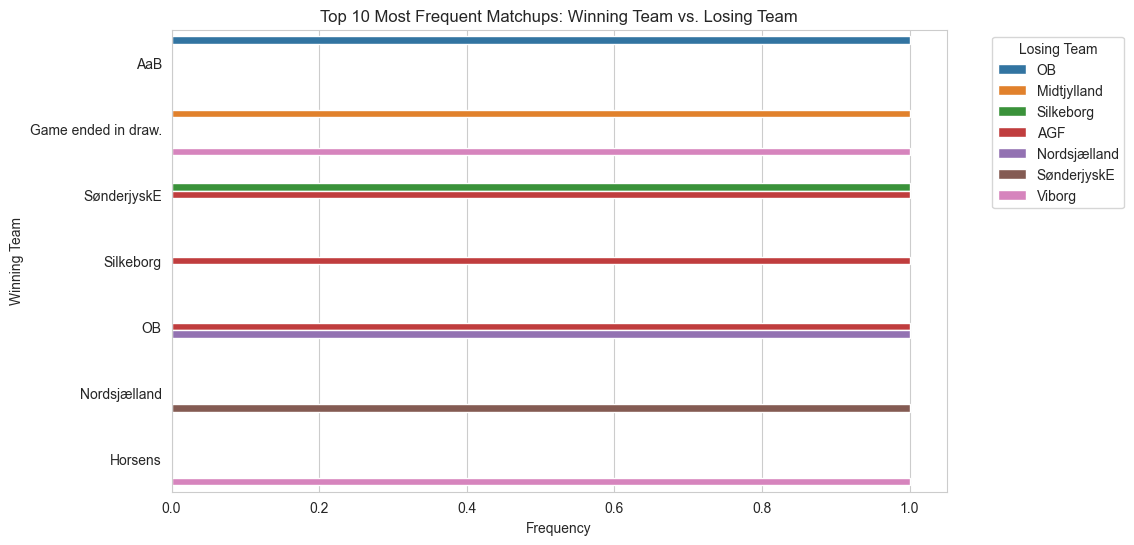

In [94]:
# Count the frequency of each matchup
matchup_counts = df.groupby(['wining_team', 'losing_team']).size().reset_index(name='count')

# Sort the matchups by count in descending order
top_matchups = matchup_counts.sort_values(by='count', ascending=False).head(10)

# Plot the top 10 matchups
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='wining_team', hue='losing_team', data=top_matchups)
plt.title('Top 10 Most Frequent Matchups: Winning Team vs. Losing Team')
plt.xlabel('Frequency')
plt.ylabel('Winning Team')
plt.legend(title='Losing Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\Aman\AppData\Local\Temp\ipykernel_13944\3841885357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='position', data=active_players, palette='viridis')


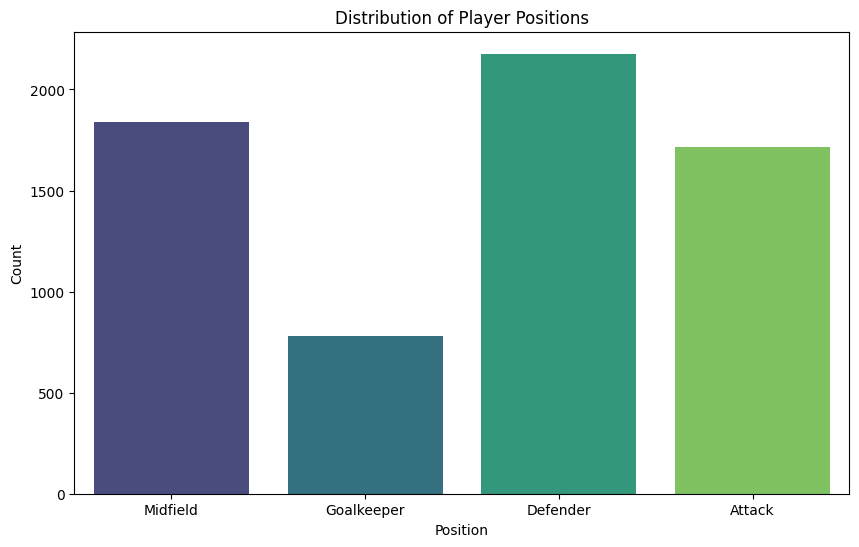

In [16]:
# Visualization 1: Distribution of player positions
plt.figure(figsize=(10, 6))
sns.countplot(x='position', data=active_players, palette='viridis')
plt.title('Distribution of Player Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

C:\Users\Aman\AppData\Local\Temp\ipykernel_13944\275980576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='foot', data=active_players, palette='magma')


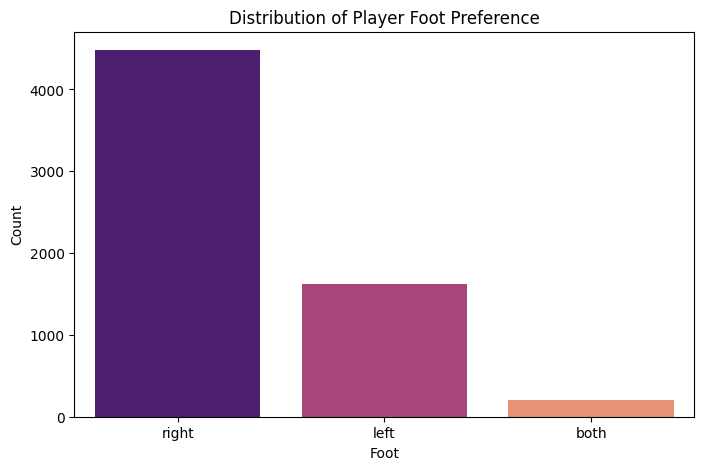

In [17]:
# Visualization 2: Distribution of player foot preference
plt.figure(figsize=(8, 5))
sns.countplot(x='foot', data=active_players, palette='magma')
plt.title('Distribution of Player Foot Preference')
plt.xlabel('Foot')
plt.ylabel('Count')
plt.show()

C:\Users\Aman\AppData\Local\Temp\ipykernel_13944\2279796199.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='country_of_birth', data=players_by_country, palette='muted')


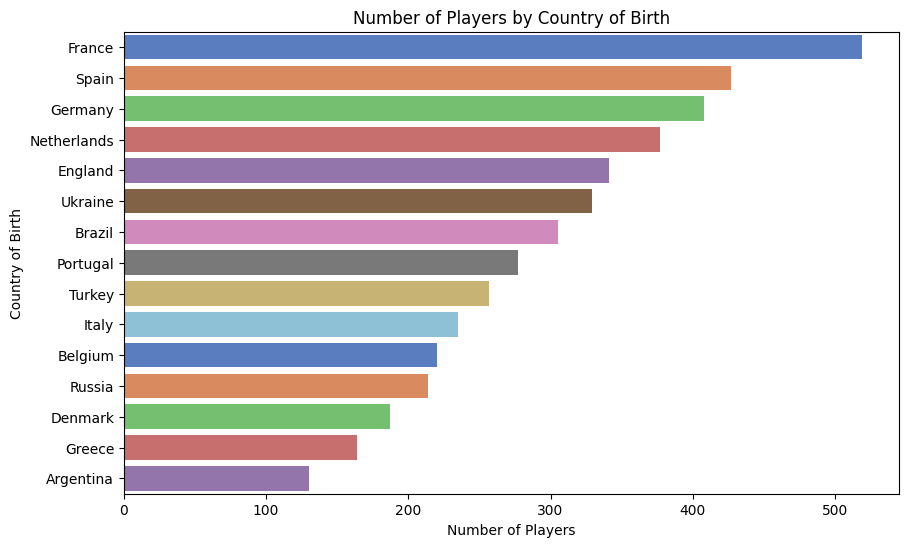

In [18]:
# Group by country of birth and count players
players_by_country = active_players.groupby('country_of_birth').size().reset_index(name='count')

# Sort by count in descending order
players_by_country = players_by_country.sort_values(by='count', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='country_of_birth', data=players_by_country, palette='muted')
plt.title('Number of Players by Country of Birth')
plt.xlabel('Number of Players')
plt.ylabel('Country of Birth')
plt.show()

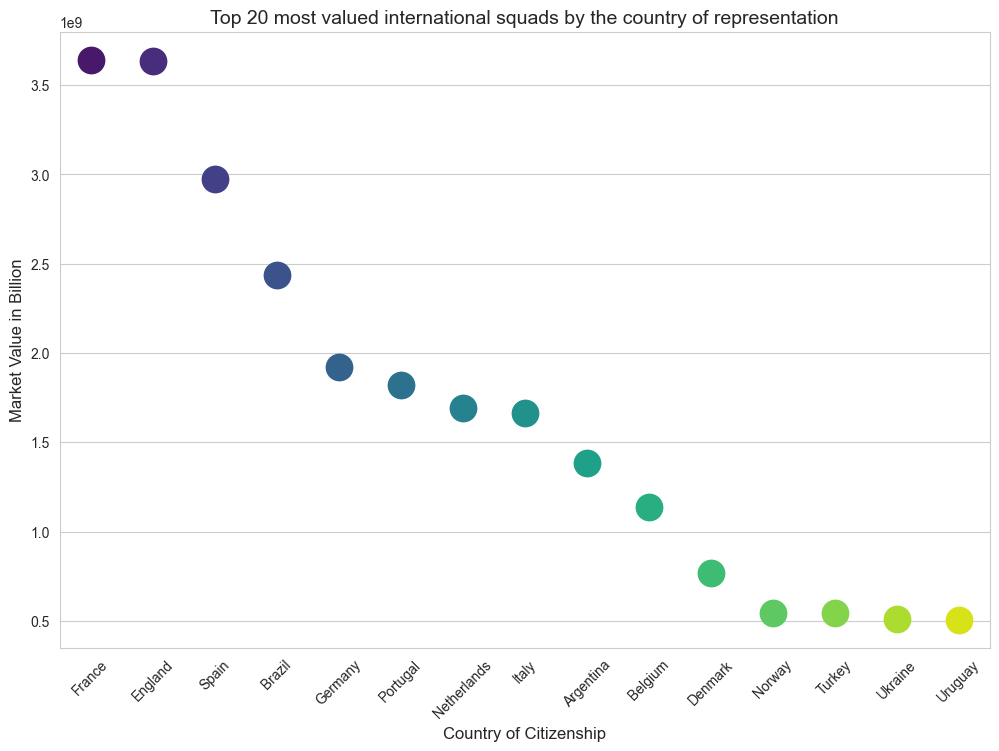

In [34]:
market_value_by_country = active_players.groupby('country_of_citizenship')['market_value_in_eur'].sum().reset_index()
market_value_by_country = market_value_by_country.sort_values(by='market_value_in_eur', ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.swarmplot(x="country_of_citizenship", y="market_value_in_eur", data=market_value_by_country, hue='country_of_citizenship', palette="viridis", size=20)
plt.title("Top 20 most valued international squads by the country of representation", fontsize=14)
plt.xlabel("Country of Citizenship", fontsize=12)
plt.xticks(rotation=45)
plt.ylabel("Market Value in Billion", fontsize=12)
plt.show()

<Figure size 1000x600 with 0 Axes>

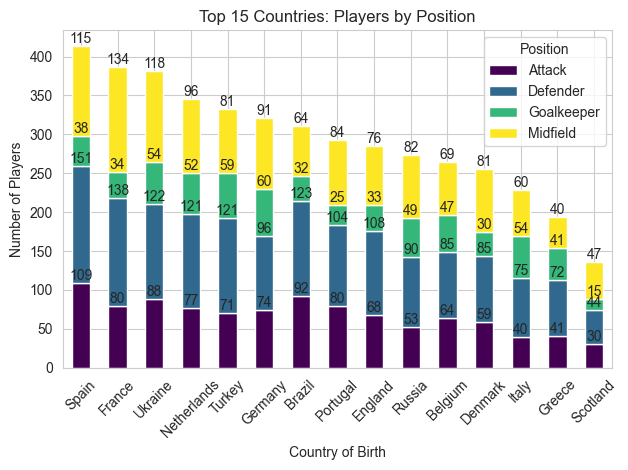

In [20]:
players_by_country_position = active_players.groupby(['country_of_citizenship', 'position']).size().reset_index(name='count')

# Pivot the table for plotting
players_by_country_position_pivot = players_by_country_position.pivot(index='country_of_citizenship', columns='position', values='count')

# Sort the data by the total number of players for each position and select top 15 countries
players_by_country_position_sorted = players_by_country_position_pivot.sum(axis=1).sort_values(ascending=False)[:15]
players_by_country_position_pivot = players_by_country_position_pivot.loc[players_by_country_position_sorted.index]
plt.figure(figsize=(10, 6))
ax = players_by_country_position_pivot.plot(kind='bar', stacked=True, colormap='viridis')

# Add value labels on top of each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='bottom')

plt.title('Top 15 Countries: Players by Position')
plt.xlabel('Country of Birth')
plt.ylabel('Number of Players')
plt.legend(title='Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
#Merging players data and clubs on clubs id
active_players.rename(columns={'current_club_id': 'club_id', 'name': 'player_name'}, inplace=True)
club_df.rename(columns={'name': 'club_name'}, inplace=True)
merged_df = pd.merge(active_players, club_df, on='club_id', how='inner')

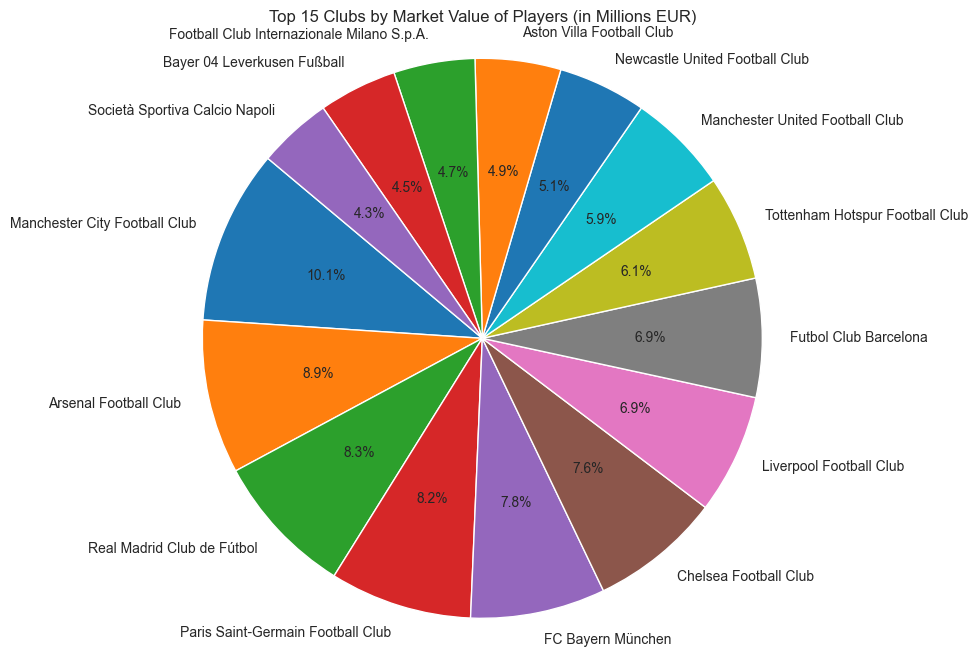

In [56]:
club_market_value = merged_df.groupby('club_name')['market_value_in_eur'].sum().reset_index()

# Convert market value to millions
club_market_value['market_value_in_millions'] = club_market_value['market_value_in_eur'] / 1000000

# Sort the clubs by market value in descending order and select top 15 clubs
top_15_clubs = club_market_value.sort_values(by='market_value_in_millions', ascending=False).head(15)
plt.figure(figsize=(10, 8))
plt.pie(top_15_clubs['market_value_in_millions'], labels=top_15_clubs['club_name'], autopct='%1.1f%%', startangle=140)
plt.title('Top 15 Clubs by Market Value of Players (in Millions EUR)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

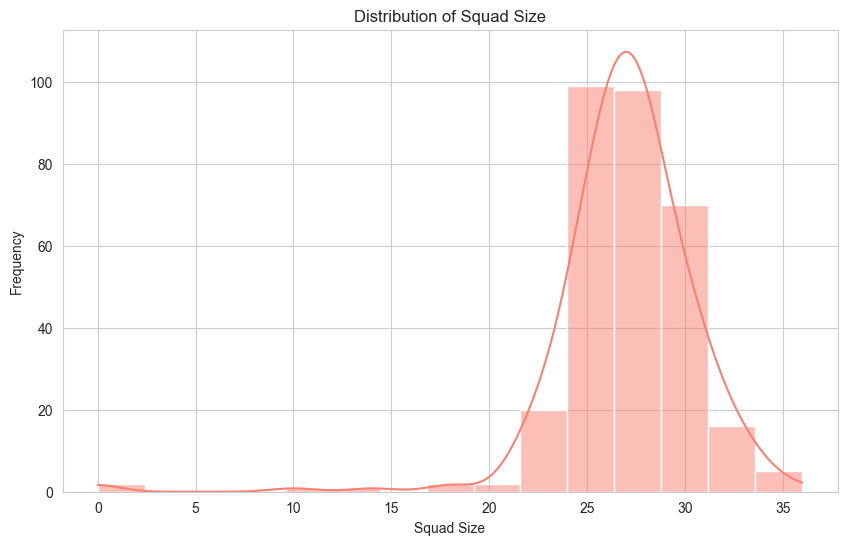

In [23]:
# 2. Squad size distribution
plt.figure(figsize=(10, 6))
sns.histplot(club_df['squad_size'], bins=15, kde=True, color='salmon')
plt.title('Distribution of Squad Size')
plt.xlabel('Squad Size')
plt.ylabel('Frequency')
plt.show()

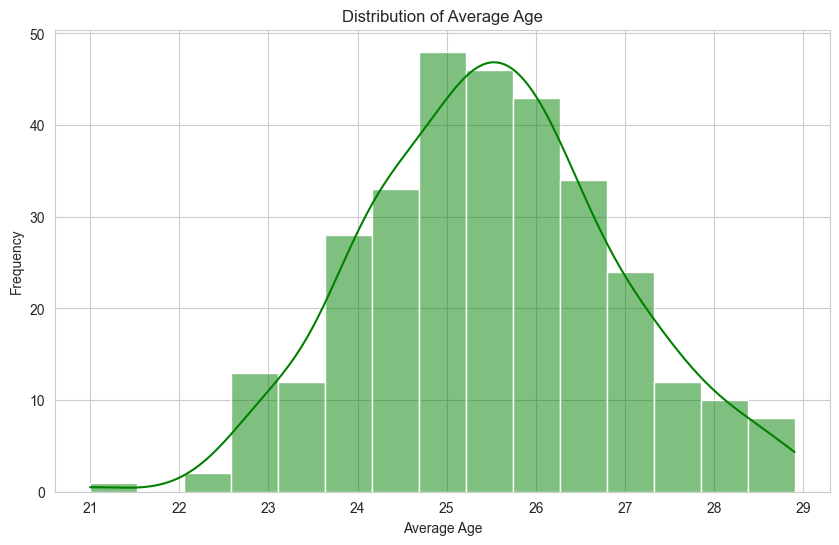

In [25]:
# 3. Average age distribution
plt.figure(figsize=(10, 6))
sns.histplot(club_df['average_age'], bins=15, kde=True, color='green')
plt.title('Distribution of Average Age')
plt.xlabel('Average Age')
plt.ylabel('Frequency')
plt.show()

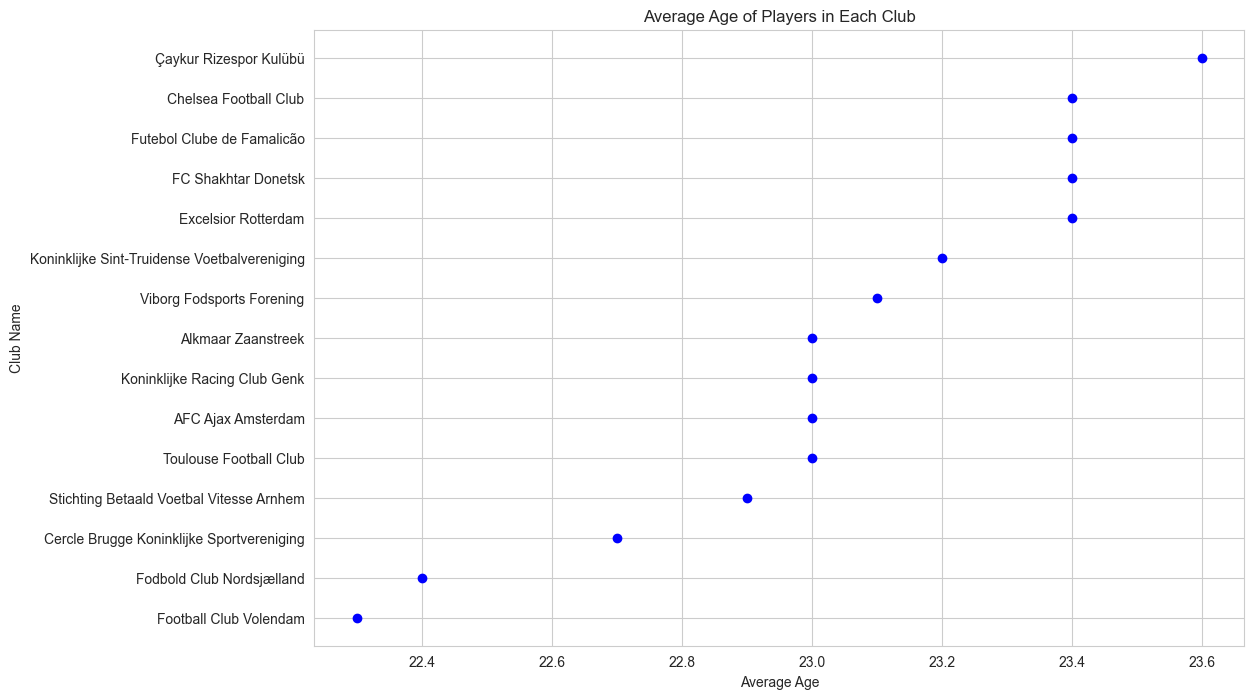

In [58]:
club_average_age = merged_df.groupby('club_name')['average_age'].mean().reset_index()
club_average_age_sorted = club_average_age.sort_values(by='average_age').head(15)

plt.figure(figsize=(12, 8))
plt.scatter(club_average_age_sorted['average_age'], club_average_age_sorted['club_name'], color='blue')
plt.title('Average Age of Players in Each Club')
plt.xlabel('Average Age')
plt.ylabel('Club Name')
plt.grid(True)
plt.show()

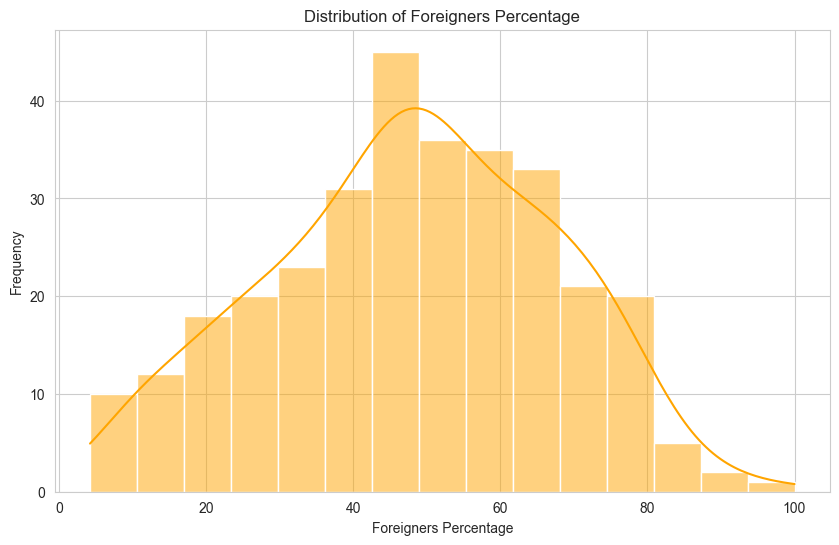

In [27]:
# 4. Foreigners percentage distribution
plt.figure(figsize=(10, 6))
sns.histplot(club_df['foreigners_percentage'], bins=15, kde=True, color='orange')
plt.title('Distribution of Foreigners Percentage')
plt.xlabel('Foreigners Percentage')
plt.ylabel('Frequency')
plt.show()

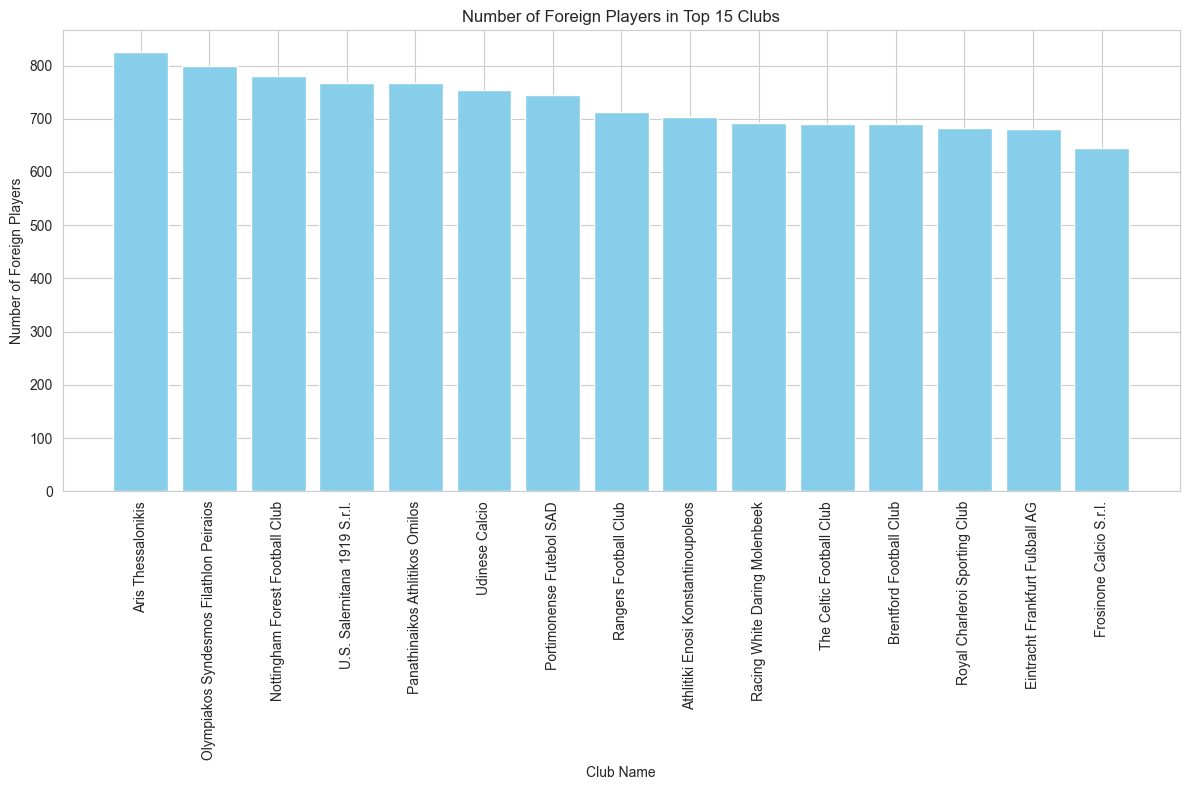

In [61]:
# Group by club and calculate the total number of foreign players in each club
club_foreigners = merged_df.groupby('club_name')['foreigners_number'].sum().reset_index()
top_15_foreigners_clubs = club_foreigners.sort_values(by='foreigners_number', ascending=False).head(15)

plt.figure(figsize=(12, 8))
plt.bar(top_15_foreigners_clubs['club_name'], top_15_foreigners_clubs['foreigners_number'], color='skyblue')
plt.title('Number of Foreign Players in Top 15 Clubs')
plt.xlabel('Club Name')
plt.ylabel('Number of Foreign Players')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

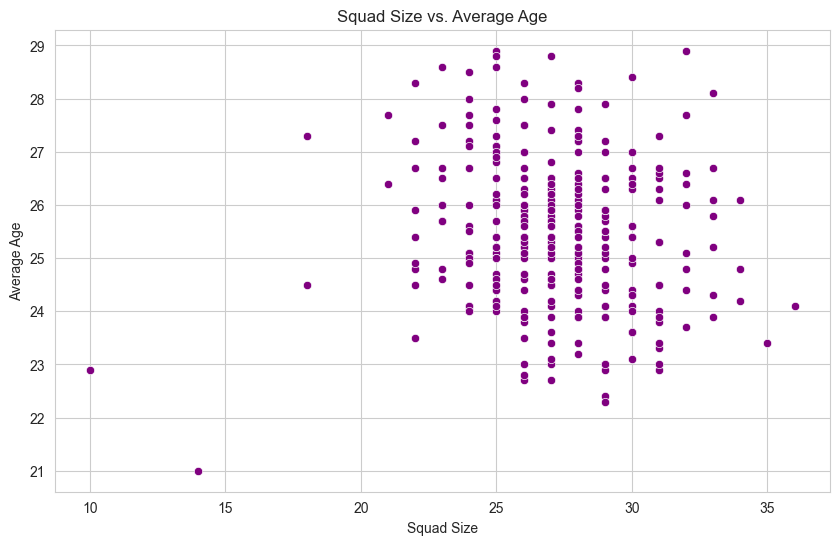

In [29]:
# 5. Relationship between squad size and average age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='squad_size', y='average_age', data=club_df, color='purple')
plt.title('Squad Size vs. Average Age')
plt.xlabel('Squad Size')
plt.ylabel('Average Age')
plt.show()

# Clustering

In [4]:
appearances_df = pd.read_csv('player-scores\\appearances.csv')
club_games_df = pd.read_csv('player-scores\\club_games.csv')
competitions_df = pd.read_csv('player-scores\\competitions.csv')
game_events_df = pd.read_csv('player-scores\\game_events.csv')
game_lineups_df = pd.read_csv('player-scores\\game_lineups.csv')
games_df = pd.read_csv('player-scores\\games.csv')
player_valuations_df = pd.read_csv('player-scores\\player_valuations.csv')


In [19]:
clubs_df.columns

Index(['club_id', 'club_code', 'name', 'domestic_competition_id',
       'total_market_value', 'squad_size', 'average_age', 'foreigners_number',
       'foreigners_percentage', 'national_team_players', 'stadium_name',
       'stadium_seats', 'net_transfer_record', 'coach_name', 'last_season',
       'filename', 'url'],
      dtype='object')

In [22]:
games_df.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [21]:
player_valuations_df.columns

Index(['player_id', 'date', 'market_value_in_eur', 'current_club_id',
       'player_club_domestic_competition_id'],
      dtype='object')

In [20]:
players_df.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur'],
      dtype='object')

In [13]:
appearances_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'player_club_id',
       'player_current_club_id', 'date', 'player_name', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played'],
      dtype='object')

In [14]:
club_games_df.columns

Index(['game_id', 'club_id', 'own_goals', 'own_position', 'own_manager_name',
       'opponent_id', 'opponent_goals', 'opponent_position',
       'opponent_manager_name', 'hosting', 'is_win'],
      dtype='object')

In [15]:
competitions_df.columns

Index(['competition_id', 'competition_code', 'name', 'sub_type', 'type',
       'country_id', 'country_name', 'domestic_league_code', 'confederation',
       'url'],
      dtype='object')

In [16]:
game_events_df.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'description', 'player_in_id', 'player_assist_id'],
      dtype='object')

In [17]:
game_lineups_df.columns

Index(['game_lineups_id', 'game_id', 'club_id', 'type', 'number', 'player_id',
       'player_name', 'team_captain', 'position'],
      dtype='object')

In [5]:
appearances_df = appearances_df[appearances_df['date'].str.startswith('2023')]

In [6]:
players_df = players_df[(players_df.last_season == 2023) & (players_df.date_of_birth.isna() == False)]

In [7]:
merged_data = appearances_df.merge(players_df, how='left', on='player_id')

In [8]:
merged_data.columns

Index(['appearance_id', 'game_id', 'player_id', 'player_club_id',
       'player_current_club_id', 'date', 'player_name', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'first_name', 'last_name', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur'],
      dtype='object')

In [8]:
merged_data = merged_data[['appearance_id', 'game_id', 'player_id', 'player_club_id',
       'player_current_club_id', 'date', 'player_name', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'first_name', 'last_name', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur']]

In [40]:
merged_data.to_csv('demo.csv', index=False)

In [9]:
# Select relevant features for PCA and SVD
features = ['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
            'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur']

# Drop missing values if any
df_filtered = merged_data.dropna(subset=features)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filtered[features])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

C:\Users\Aman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

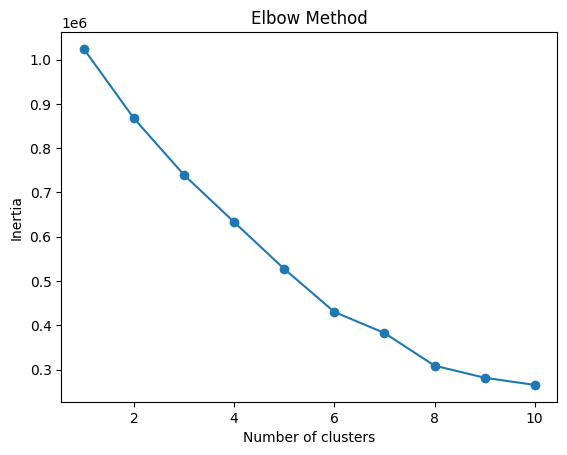

In [10]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [66]:
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

C:\Users\Aman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

NameError: name 'cluster_range' is not defined

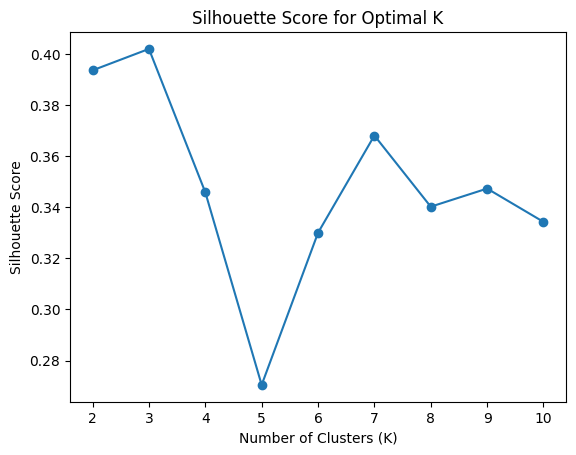

In [68]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()

In [13]:
df_filtered['pca1'] = pca_result[:, 0]
df_filtered['pca2'] = pca_result[:, 1]

C:\Users\Aman\AppData\Local\Temp\ipykernel_18156\1071063723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pca1'] = pca_result[:, 0]
C:\Users\Aman\AppData\Local\Temp\ipykernel_18156\1071063723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pca2'] = pca_result[:, 1]


C:\Users\Aman\AppData\Local\Temp\ipykernel_18156\3527280077.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_filtered['pca1'], df_filtered['pca2'], cmap='viridis')


Text(0, 0.5, 'PCA Component 2')

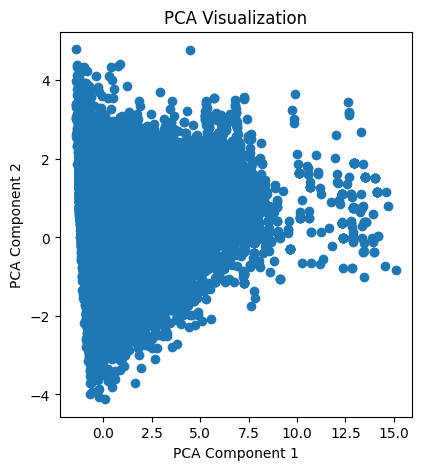

In [14]:
# Visualize PCA results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_filtered['pca1'], df_filtered['pca2'], cmap='viridis')
plt.title('PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

In [15]:
# Perform SVD
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(scaled_data)

In [16]:
df_filtered['svd1'] = svd_result[:, 0]
df_filtered['svd2'] = svd_result[:, 1]

C:\Users\Aman\AppData\Local\Temp\ipykernel_18156\3103853145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['svd1'] = svd_result[:, 0]
C:\Users\Aman\AppData\Local\Temp\ipykernel_18156\3103853145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['svd2'] = svd_result[:, 1]


C:\Users\Aman\AppData\Local\Temp\ipykernel_18156\2356658333.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_filtered['svd1'], df_filtered['svd2'], cmap='viridis')


Text(0, 0.5, 'SVD Component 2')

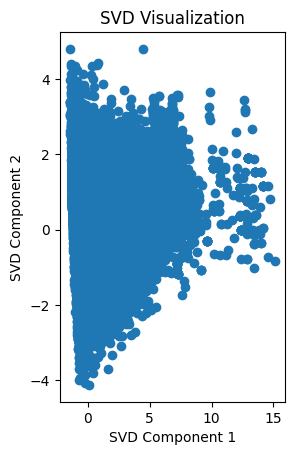

In [17]:
# Visualize SVD results
plt.subplot(1, 2, 2)
plt.scatter(df_filtered['svd1'], df_filtered['svd2'], cmap='viridis')
plt.title('SVD Visualization')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')

In [18]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)

C:\Users\Aman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
df_filtered['cluster'] = clusters

C:\Users\Aman\AppData\Local\Temp\ipykernel_18156\4139714659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = clusters


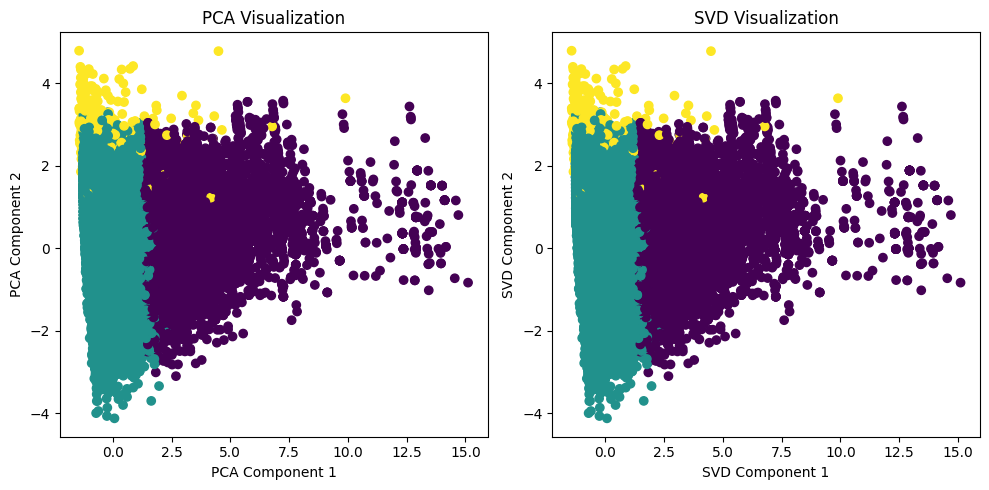

In [20]:
# Visualize PCA results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_filtered['pca1'], df_filtered['pca2'], c=df_filtered['cluster'], cmap='viridis')
plt.title('PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Visualize SVD results
plt.subplot(1, 2, 2)
plt.scatter(df_filtered['svd1'], df_filtered['svd2'], c=df_filtered['cluster'], cmap='viridis')
plt.title('SVD Visualization')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')

plt.tight_layout()
plt.show()


In [21]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)
df_filtered['cluster2'] = clusters

C:\Users\Aman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aman\AppData\Local\Temp\ipykernel_18156\1167620724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster2'] = clusters


Text(0, 0.5, 'PCA Component 2')

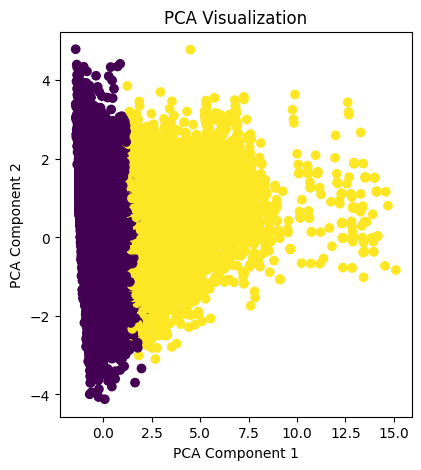

In [22]:
# Visualize PCA results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_filtered['pca1'], df_filtered['pca2'], c=df_filtered['cluster2'], cmap='viridis')
plt.title('PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

In [27]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)
df_filtered['cluster3'] = clusters

C:\Users\Aman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aman\AppData\Local\Temp\ipykernel_18156\3291411990.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster3'] = clusters


Text(0, 0.5, 'PCA Component 2')

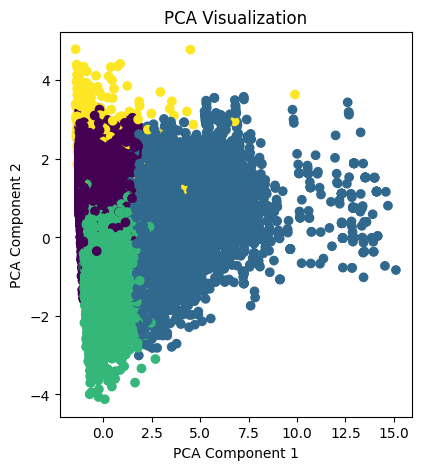

In [28]:
# Visualize PCA results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_filtered['pca1'], df_filtered['pca2'], c=df_filtered['cluster3'], cmap='viridis')
plt.title('PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

C:\Users\Aman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


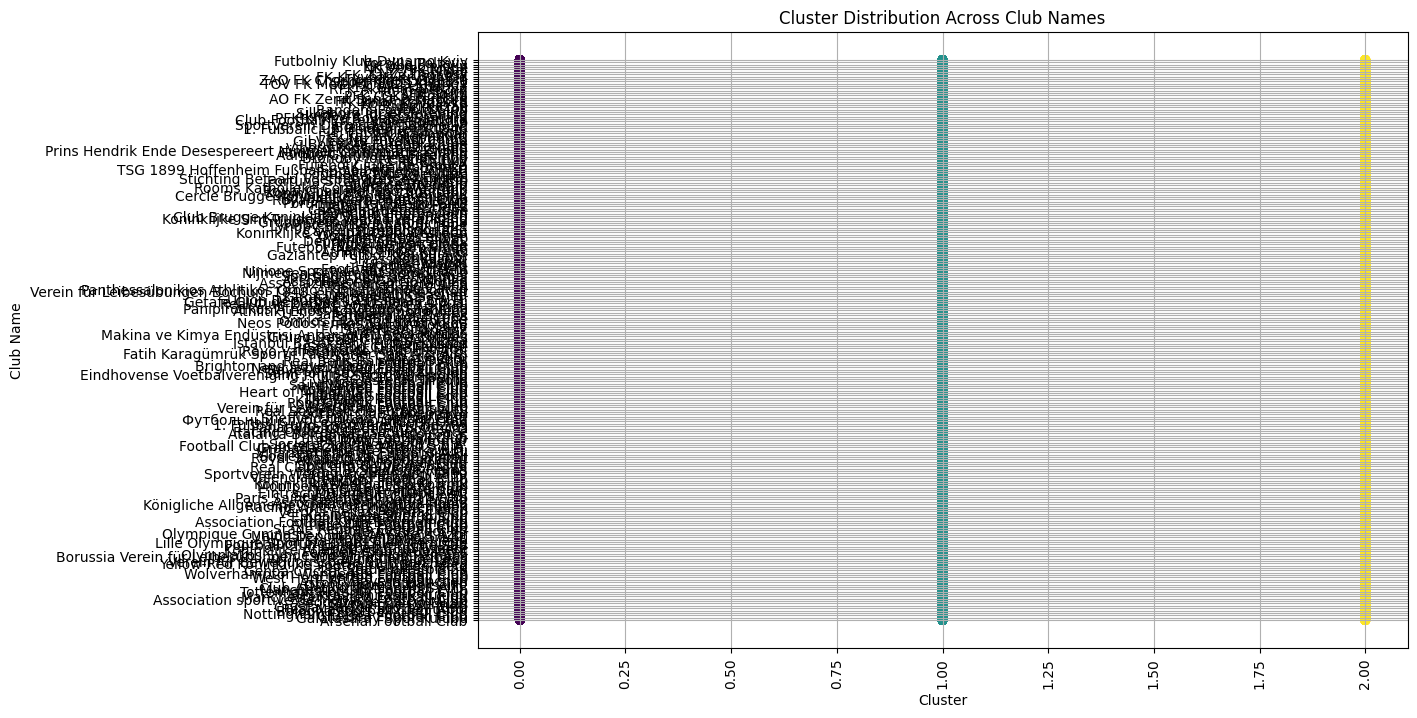

In [65]:
df = df_filtered.copy()
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[numeric_cols])

# Group by clusters and club names, and count the number of players
club_cluster_counts = df.groupby(['cluster', 'current_club_name']).size().reset_index(name='player_count')

# Create a pivot table for visualization
club_cluster_pivot = club_cluster_counts.pivot(index='current_club_name', columns='cluster', values='player_count')

plt.figure(figsize=(12, 8))
plt.scatter(df['cluster'], df['current_club_name'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Cluster')
plt.ylabel('Club Name')
plt.title('Cluster Distribution Across Club Names')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [43]:
len(df_filtered.current_club_name.unique())

238

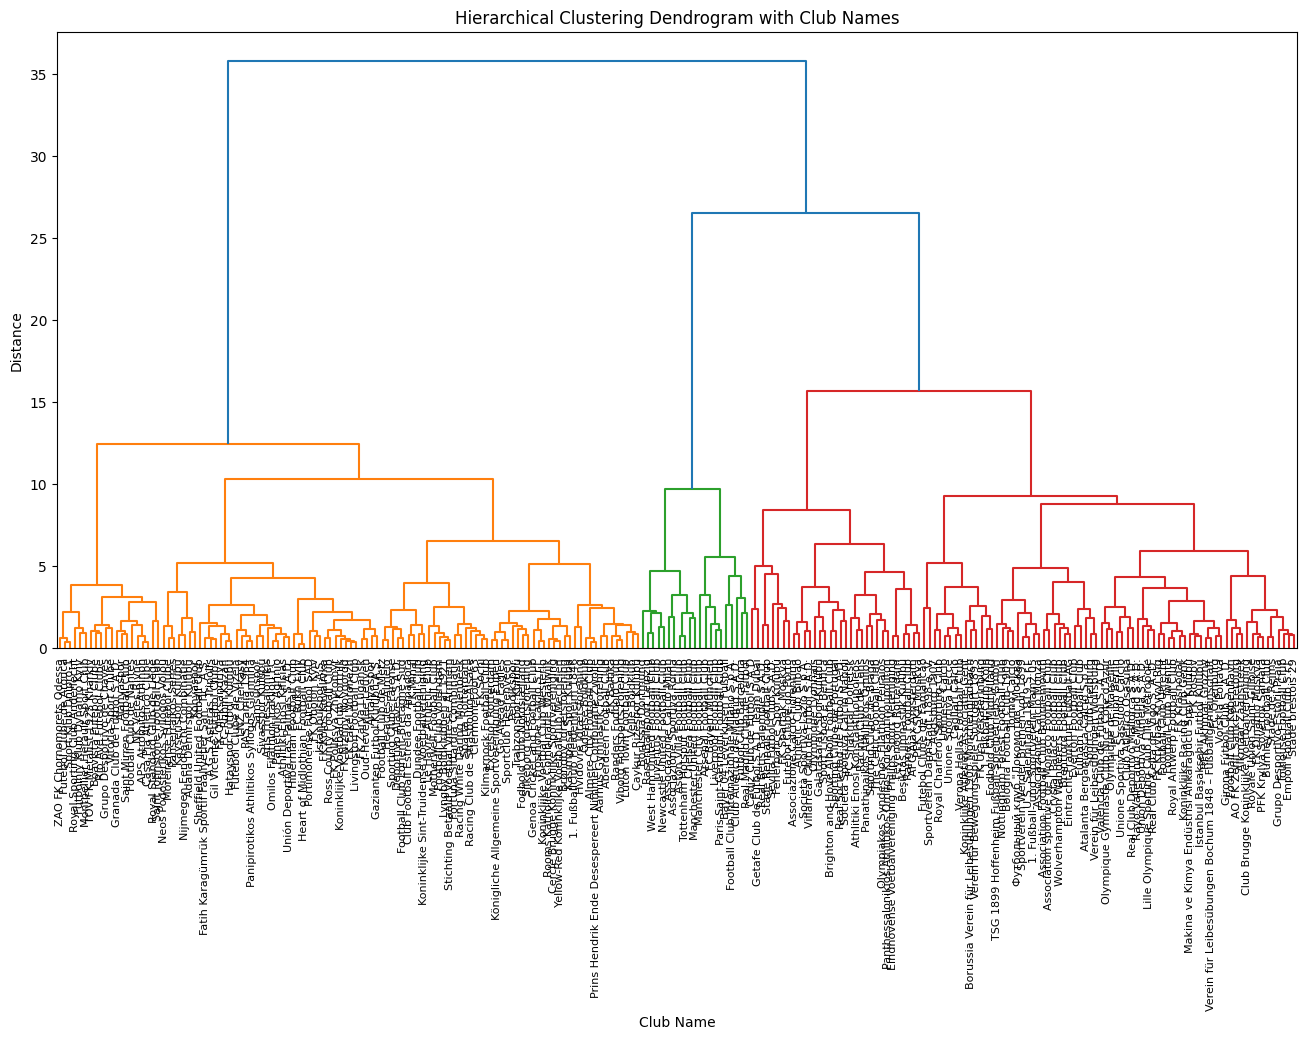

In [45]:
club_data = df_filtered.groupby('current_club_name').agg({
    'yellow_cards': 'sum',
    'red_cards': 'sum',
    'goals': 'sum',
    'assists': 'sum',
    'minutes_played': 'sum',
    'height_in_cm': 'mean',
    'market_value_in_eur': 'mean',
    'highest_market_value_in_eur': 'mean'
}).reset_index()

# Select relevant columns for clustering
selected_columns = ['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
                    'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur']
data = club_data[selected_columns]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform hierarchical clustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cluster_labels = model.fit_predict(data_scaled)

# Plot dendrogram with club names
plt.figure(figsize=(16, 8))
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'), labels=club_data['current_club_name'].values, leaf_rotation=90, leaf_font_size=8)
plt.xlabel('Club Name')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram with Club Names')
plt.xticks(rotation=90)
plt.show()


In [69]:
df_filtered.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,...,current_club_name,market_value_in_eur,highest_market_value_in_eur,pca1,pca2,svd1,svd2,cluster,cluster2,cluster3
0,3838268_102017,3838268,102017,631,11,2023-01-01,Jorginho,GB1,0,0,...,Arsenal Football Club,15000000.0,65000000.0,1.774621,0.718098,1.774621,0.718098,2,0,1
1,3838268_127032,3838268,127032,703,141,2023-01-01,Serge Aurier,GB1,0,0,...,Galatasaray Spor Kulübü,7000000.0,20000000.0,0.668698,-0.160434,0.668698,-0.160434,0,1,2
2,3838268_134425,3838268,134425,631,631,2023-01-01,Raheem Sterling,GB1,0,0,...,Chelsea Football Club,45000000.0,160000000.0,6.635518,1.686512,6.635518,1.686512,2,0,1
3,3838268_142310,3838268,142310,703,703,2023-01-01,Willy Boly,GB1,0,0,...,Nottingham Forest Football Club,2500000.0,18000000.0,0.326282,-1.427871,0.326282,-1.427871,0,1,2
4,3838268_148252,3838268,148252,703,1025,2023-01-01,Remo Freuler,GB1,0,0,...,Bologna Football Club 1909,6500000.0,25000000.0,0.227383,-0.110467,0.227383,-0.110467,0,1,2
